### 기본 라이브러리 임포트 및 데이터 확인

In [1]:
# import the standard python scientific libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#suppress deprecation and incorrect usage warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
question=pd.read_csv('./datasets_2733_5713_schema.csv')
print(question.shape)

(290, 3)


In [8]:
# 상위 5개 column만 출력
question.head()

# 하위 5개 column만 출력
# question.tail()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [25]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq=pd.read_csv('./multipleChoiceResponses.csv',
               encoding="ISO-8859-1", low_memory=False)
print(mcq.shape)
#->16716명이 응답, 선다형 객관식 문제는 228개

(16716, 228)


In [11]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [15]:
mcq.head(10)
# mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


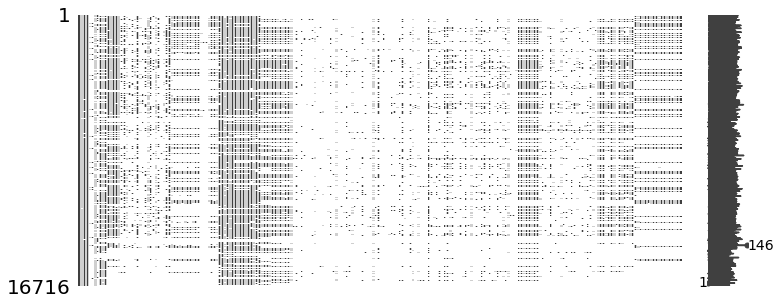

In [19]:
# missingno는 NaN 데이터들에 대한 시각화를 해준다

import missingno as msno
msno.matrix(mcq,figsize=(12,5))
#->NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어려움

### 설문통계

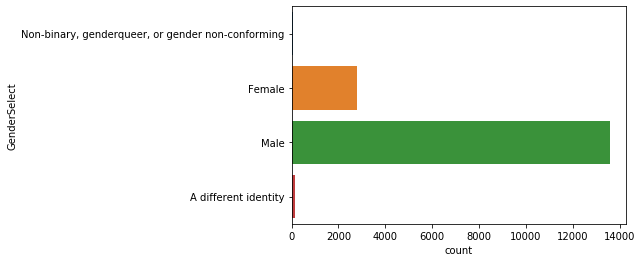

In [21]:
# 성별 응답수
sns.countplot(y='GenderSelect', data=mcq)
#-> 남성>여성

In [23]:
# 국가별 응답수
con_df=pd.DataFrame(mcq['Country'].value_counts())
print(con_df)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Poland                           184
Singapore                        184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [24]:
# country 컬럼을 인덱스로 지정
con_df['국가']=con_df.index

# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해줌
con_df.columns=['응답 수', '국가']

In [25]:
print(con_df)

                             응답 수                           국가
United States                4197                United States
India                        2704                        India
Other                        1023                        Other
Russia                        578                       Russia
United Kingdom                535               United Kingdom
People 's Republic of China   471  People 's Republic of China
Brazil                        465                       Brazil
Germany                       460                      Germany
France                        442                       France
Canada                        440                       Canada
Australia                     421                    Australia
Spain                         320                        Spain
Japan                         277                        Japan
Taiwan                        254                       Taiwan
Italy                         238                      

In [26]:
# index 컬럼 삭제 후 순위를 알기위해 reset_index()를 해준다
con_df=con_df.reset_index().drop('index',axis=1)

# 상위 20개국까지만 보기
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [27]:
# 연령별 응답수

# describe는 데이터에 대한 모든 통계결과를 한번에 제공해줌
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

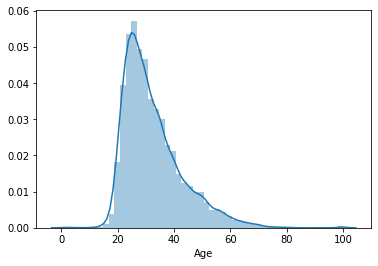

In [32]:
# 나이 데이터 시각화

sns.distplot(mcq[mcq['Age']>0]['Age'])
# sns.distplot(mcq['Age']) 둘이 뭐가 다른건지는 잘 모르겠음

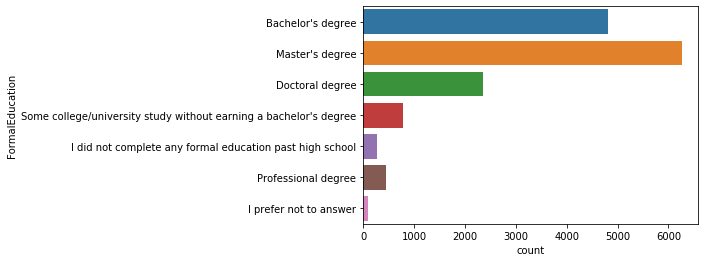

In [33]:
# 학력별 응답수
sns.countplot(y='FormalEducation', data=mcq)

In [35]:
# 전공별 응답수

mcq_major_count=pd.DataFrame(mcq['MajorSelect'].value_counts())

mcq_major_percent=pd.DataFrame(mcq['MajorSelect']
                               .value_counts(normalize=True))

In [36]:
mcq_major_count

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


In [37]:
mcq_major_percent

,MajorSelect
Computer Science,0.331074
Mathematics or statistics,0.167156
Engineering (non-computer focused),0.100821
Electrical Engineering,0.098110
Other,0.063851
Physics,0.062495
"Information technology, networking, or system administration",0.052180
A social science,0.039982
Biology,0.020631
Management information systems,0.017845


In [38]:
# 전공별 count와 비율을 합친 dataframe

mcq_major_df=mcq_major_count.merge(mcq_major_percent,
                                   left_index=True,right_index=True)
mcq_major_df.columns=['응답 수','비율']

In [39]:
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


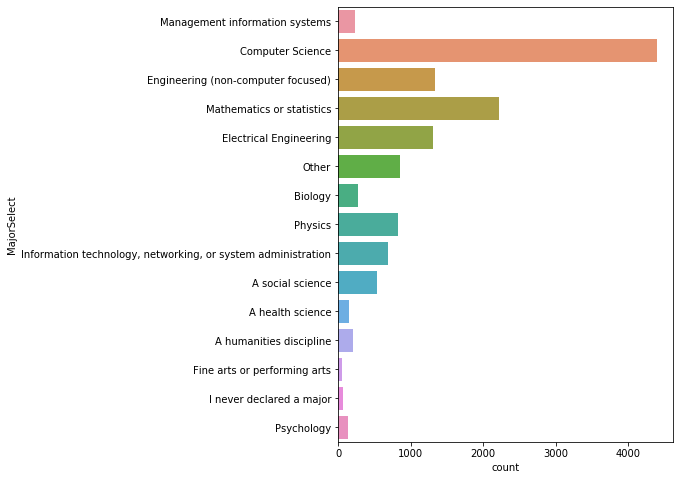

In [40]:
# 전공별 응답수 시각화

plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

In [42]:
# 취업여부 별 응답수

mcq_es_count=pd.DataFrame(mcq['EmploymentStatus'].value_counts())

mcq_es_percent=pd.DataFrame(mcq['EmploymentStatus']
                          .value_counts(normalize=True))

In [43]:
mcq_es_count

,EmploymentStatus
Employed full-time,10897
"Not employed, but looking for work",2110
"Independent contractor, freelancer, or self-employed",1330
"Not employed, and not looking for work",924
Employed part-time,917
I prefer not to say,420
Retired,118


In [44]:
mcq_es_percent

,EmploymentStatus
Employed full-time,0.651890
"Not employed, but looking for work",0.126226
"Independent contractor, freelancer, or self-employed",0.079564
"Not employed, and not looking for work",0.055276
Employed part-time,0.054858
I prefer not to say,0.025126
Retired,0.007059


In [45]:
# 취업여부별 count와 비율을 합친 dataframe

mcq_es_df=mcq_es_count.merge(mcq_es_percent,
                             left_index=True, right_index=True)
mcq_es_df.columns=['응답 수', '비율']

In [46]:
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


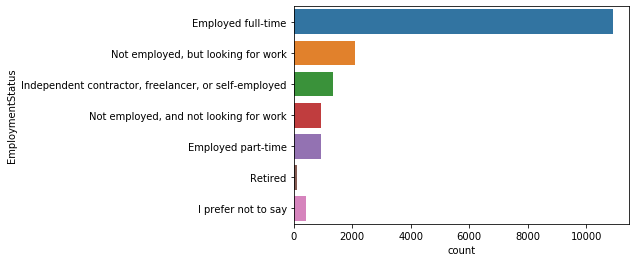

In [47]:
# 취업여부별 응답수 시각화

sns.countplot(y='EmploymentStatus', data=mcq)

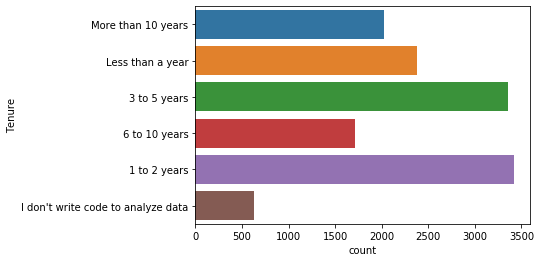

In [48]:
# 프로그래밍 경험별 응답수 시각화

sns.countplot(y='Tenure', data=mcq)

In [121]:
# 한국사람들의 데이터 보기

korea=mcq.loc[(mcq['Country']=='South Korea')]

The number of interviewees in Korea: 194


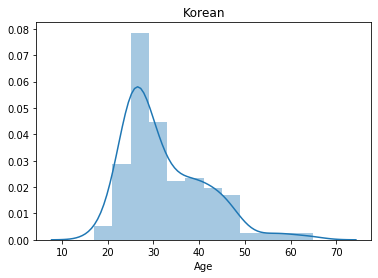

In [51]:
print('The number of interviewees in Korea: '+str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [52]:
# 한국사람의 성별 응답수
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

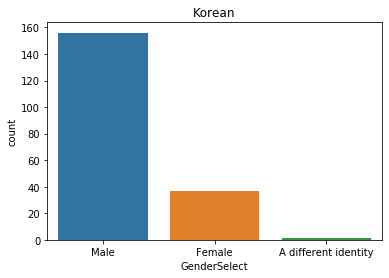

In [53]:
# 한국사람의 성별 응답수 시각화

sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

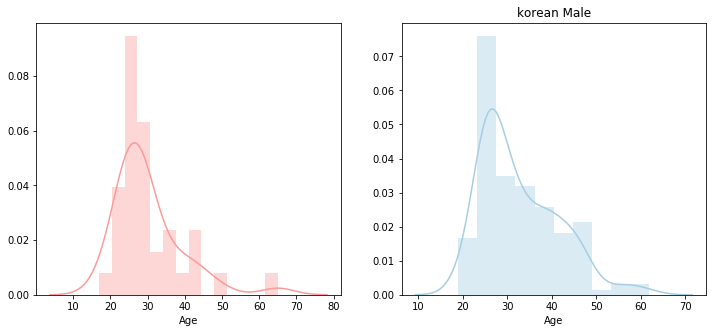

In [54]:
# 한국사람들의 성별-나이별 응답수

figure, (ax1,ax2)=plt.subplots(ncols=2)
figure.set_size_inches(12,5)

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

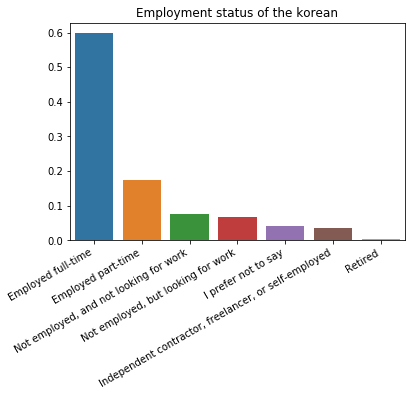

In [56]:
# 한국사람의 취업여부별 응답수 시각화

sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel(' ')
plt.show()

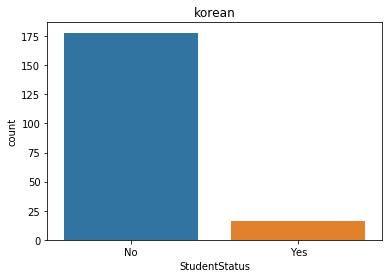

In [58]:
# 한국사람의 학생여부별 응답수 시각화

korea['StudentStatus']=korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

### -------------------------------

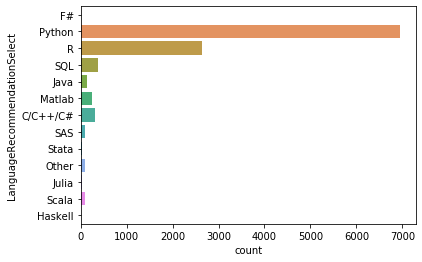

In [4]:
# 자주묻는 질문 FAQ 답변 시각화

# Q1) python과 R중 어떤 언어를 배워야 할까요?
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

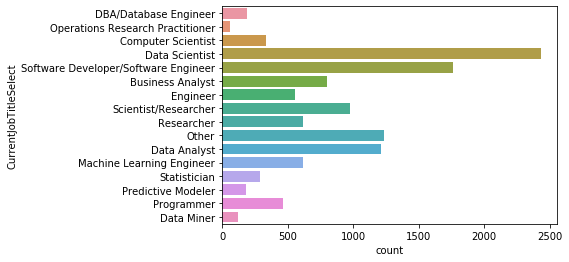

In [5]:
# 현재 하고있는 일(직업)

sns.countplot(y='CurrentJobTitleSelect', data=mcq)
sns.countplot(y=mcq['CurrentJobTitleSelect'])# 깉은 문장

In [6]:
# 현재 하고있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


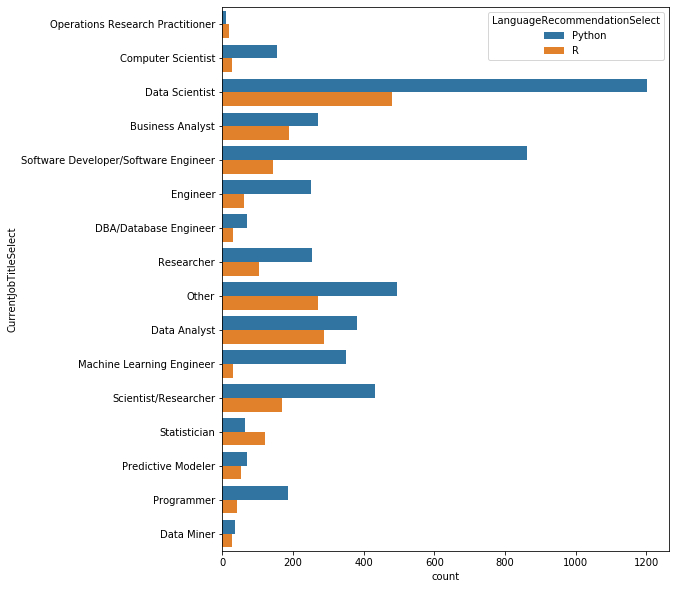

In [7]:
# 현재 하고있는 일에 대한 응답을 해준 사람 중 python과 r을 사용하는 사람 수
# -> 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
# = Q1에 대한 정답

data=mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
        (mcq['LanguageRecommendationSelect']=='Python') | 
        (mcq['LanguageRecommendationSelect']=='R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect',
             hue='LanguageRecommendationSelect',
             data=data)

In [9]:
# 자주묻는 질문 FAQ 답변 시각화

# Q2) 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

mcq_ml_tool_count=pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent=pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df=mcq_ml_tool_count.merge(mcq_ml_tool_percent,
                                      left_index=True,right_index=True).head(20)
mcq_ml_tool_df.columns=['응답 수','비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


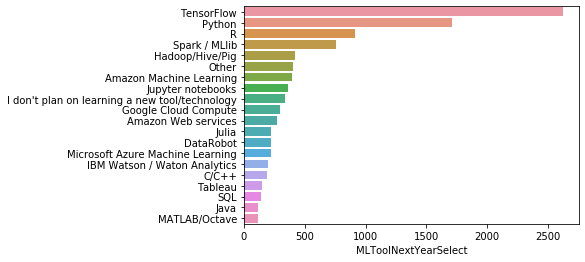

In [10]:
# 위의 결과 시각화
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,x=data)

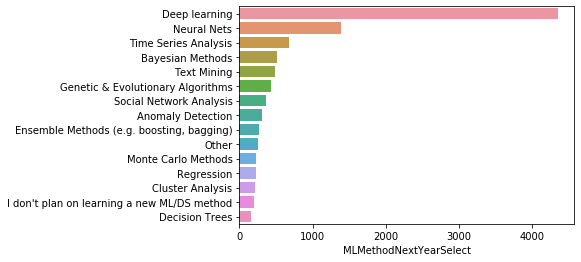

In [11]:
# 데이터사이언스 방법에 관한 응답 수 시각화
data=mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index,x=data)

In [12]:
# 자주묻는 질문 FAQ 답변 시각화

# Q3) 어디에서 데이터 사이언스를 배워야 할까요?

mcq['LearningPlatformSelect']=mcq['LearningPlatformSelect'].astype('str').apply(lambda x:x.split(','))

s=mcq.apply(
    lambda x:pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1,drop=True)
s.name='platform'

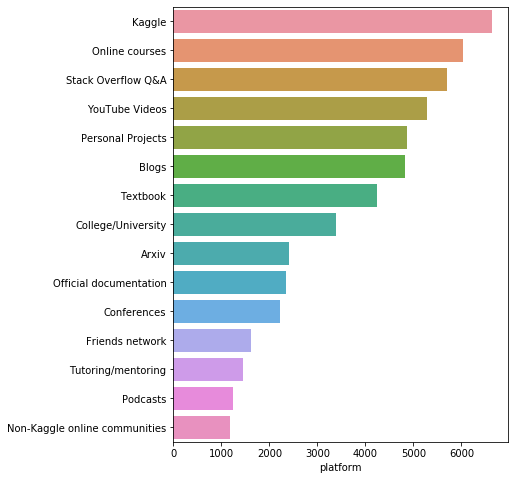

In [13]:
plt.figure(figsize=(6,8))
data=s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index,x=data)

In [14]:
# 설문 내용과 누구에게 물어봤는지를 찾아봄

qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [15]:
# 위의 항목들을 use_features에 모음
use_features=[x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]

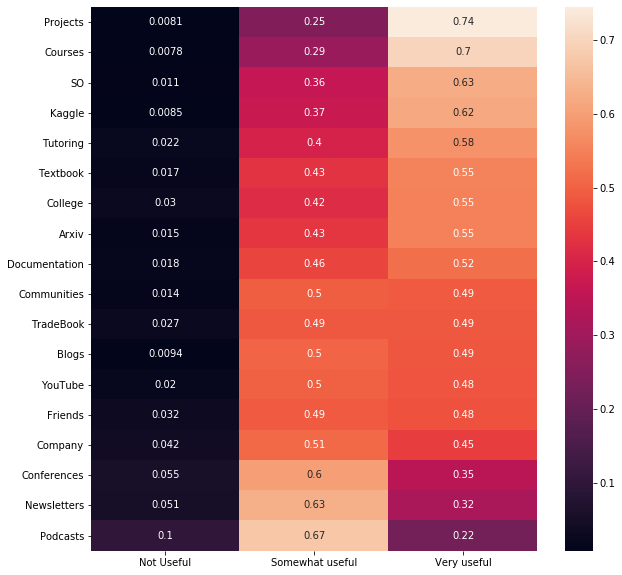

In [19]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf={}
for feature in use_features:
    a=mcq[feature].value_counts()
    a=a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf=pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values("Very useful", ascending=False), annot=True)


# ->1에 가까울 수록 유용함이 높은 것을 의미한다

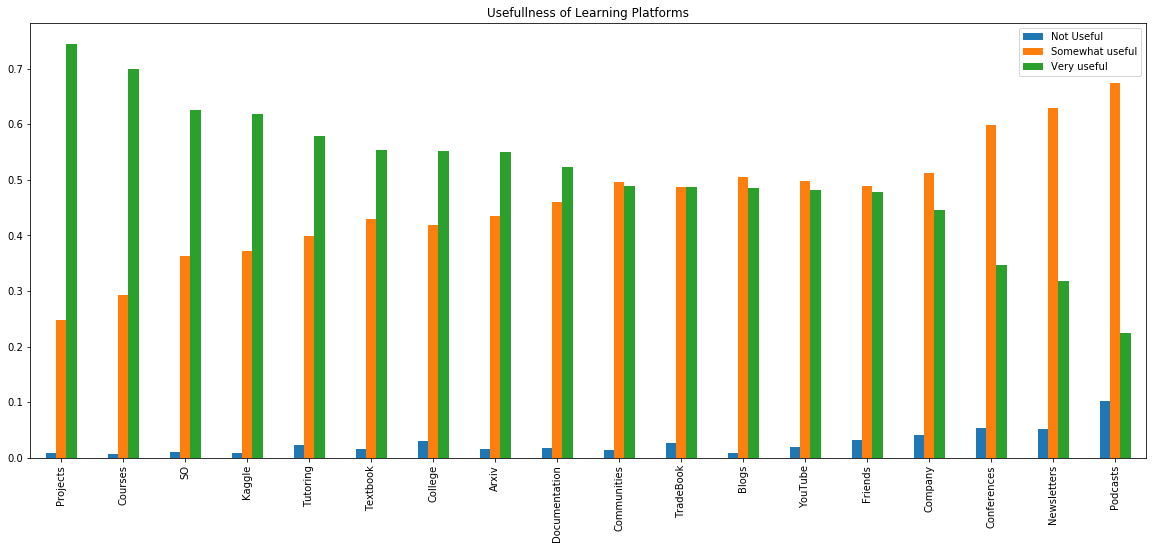

In [20]:
# 유용함의 정도를 각 플랫폼별로 그룹화해서 본다.

fdf.plot(kind='bar', figsize=(20,8),
        title="Usefullness of Learning Platforms")

In [21]:
# 위의 내용을 파이차트로 그려볼 것임

cat_features=[x for x in mcq.columns if x.find('LearningCategory')!=-1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [22]:
cdf={}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]]=mcq[feature].mean()
    
cdf=pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

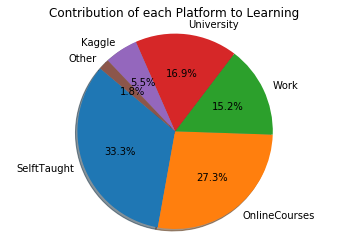

In [23]:
# 파이차트로 시각화(파이차트는 seaborn에서 지원X)

plt.pie(cdf,labels=cdf.index,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

In [25]:
# 자주묻는 질문 FAQ 답변 시각화

# Q4) 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

qc=question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [27]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

(4206,)

In [29]:
mcq['HardwarePersonalProjectsSelect'
   ]=mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x:x.split(','))
    
s=mcq.apply(lambda x:pd.Series(x['HardwarePersonalProjectsSelect']),
           axis=1).stack().reset_index(level=1,drop=True)
s.name='hardware'

In [30]:
s=s[s!='nan']

In [31]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


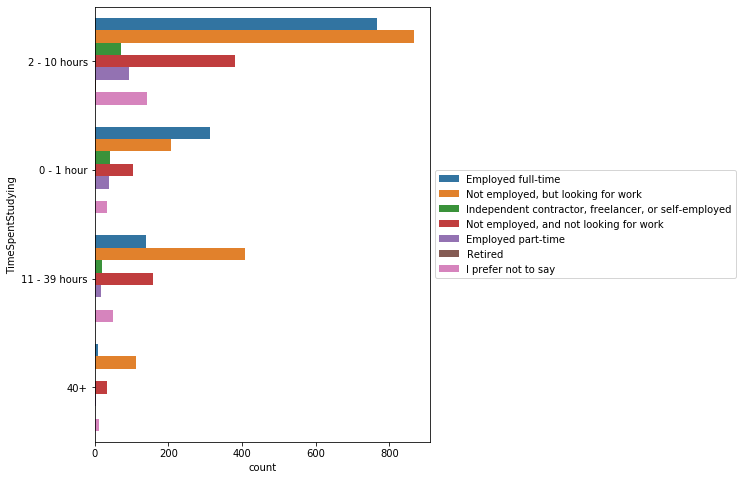

In [32]:
# 자주묻는 질문 FAQ 답변 시각화

# Q5) 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying', data=mcq,
             hue='EmploymentStatus').legend(loc='center left',
                                           bbox_to_anchor=(1,0.5))

In [35]:
# 위의 결과 나누어서 시각화
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


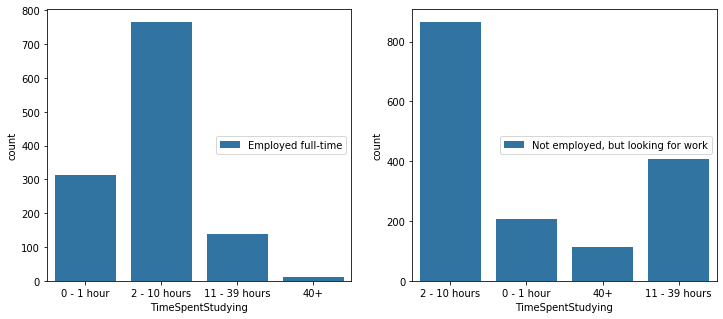

In [36]:
figure,(ax1,ax2)=plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',data=full_time,
              hue='EmploymentStatus',ax=ax1)\
              .legend(loc='center right',bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying', data=looking_for_job,
             hue='EmploymentStatus',ax=ax2)\
             .legend(loc='center right',bbox_to_anchor=(1,0.5))

### -------------------------------

In [26]:
# 자주묻는 질문 FAQ 답변 시각화

# Q6) 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

mcq['BlogsPodcastsNewslettersSelect']=mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x:x.split(','))
    
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [27]:
s=mcq.apply(lambda x:pd.Series(x['BlogsPodcastsNewslettersSelect']),
           axis=1).stack().reset_index(level=1,drop=True)

s.name='platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [28]:
s=s[s != 'nan'].value_counts().head(20)

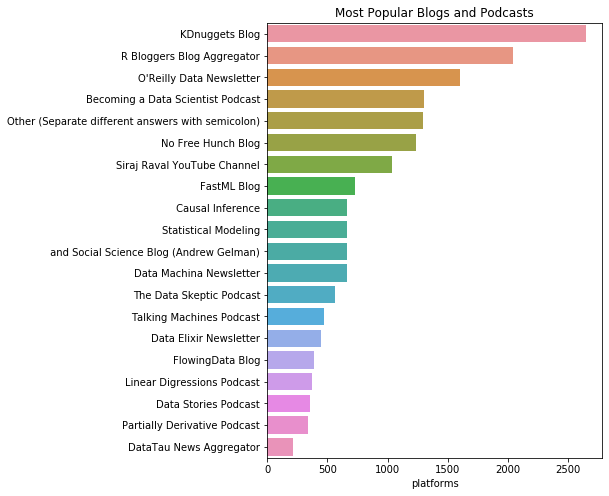

In [29]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index,x=s)

In [30]:
# 인기있는 플랫폼 응답수
mcq['CoursePlatformSelect']=mcq['CoursePlatformSelect'].astype('str').apply(lambda x:x.split(','))

mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [31]:
t=mcq.apply(lambda x:pd.Series(x['CoursePlatformSelect']),
           axis=1).stack().reset_index(level=1,drop=True)
t.name='courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

In [32]:
t=t[t!='nan'].value_counts()

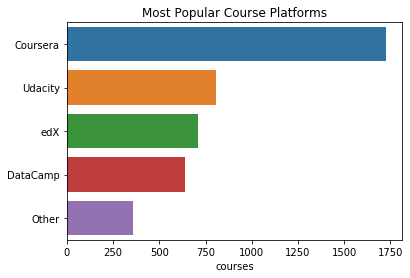

In [33]:
plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index,x=t)

In [34]:
# 자주묻는 질문 FAQ 답변 시각화

# Q7) 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

job_features=[x for x in mcq.columns if x.find(
            'JobSkillImportance') != -1
             and x.find("JobSkillImportanceOther") == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [35]:
jdf={}

for feature in job_features:
    a=mcq[feature].value_counts()
    a=a/a.sum()
    jdf[feature[len('JobSkillImportance'):]]=a
    
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [36]:
jdf=pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


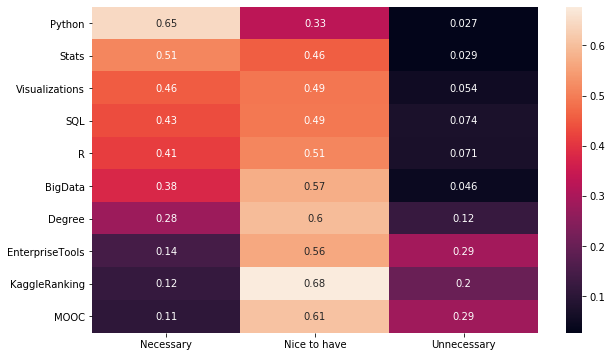

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",ascending=False),annot=True)

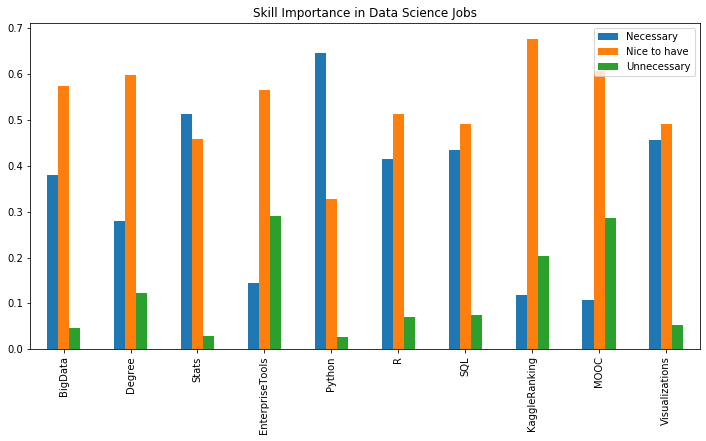

In [38]:
jdf.plot(kind='bar',figsize=(12,6),
        title='Skill Importance in Data Science Jobs')

In [58]:
# 자주묻는 질문 FAQ 답변 시각화

# Q8) 데이터 과학자의 평균 급여는 얼마나 될까?

mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [59]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','').replace('-','')
# mcq['CompensationAmount'] = mcq[
#     'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('./datasets_2733_5713_conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [60]:
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

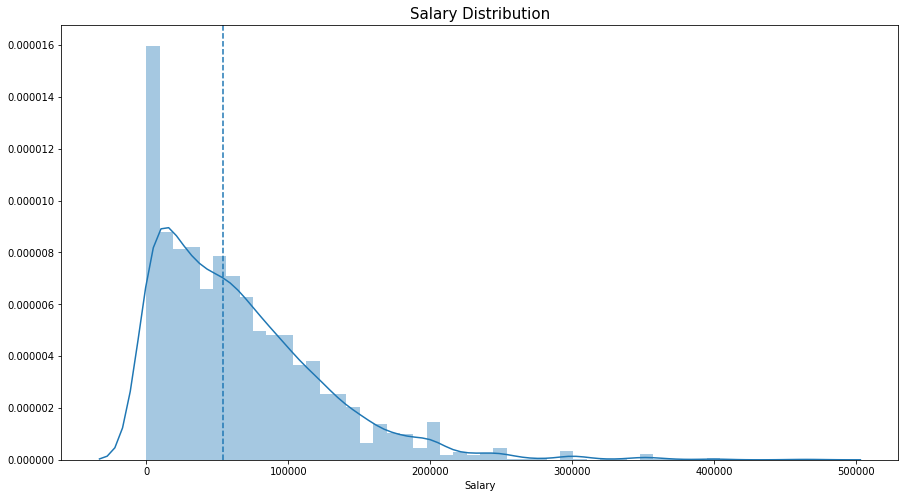

In [62]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed') #원하는 값에 선 그릴 수 있음
plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

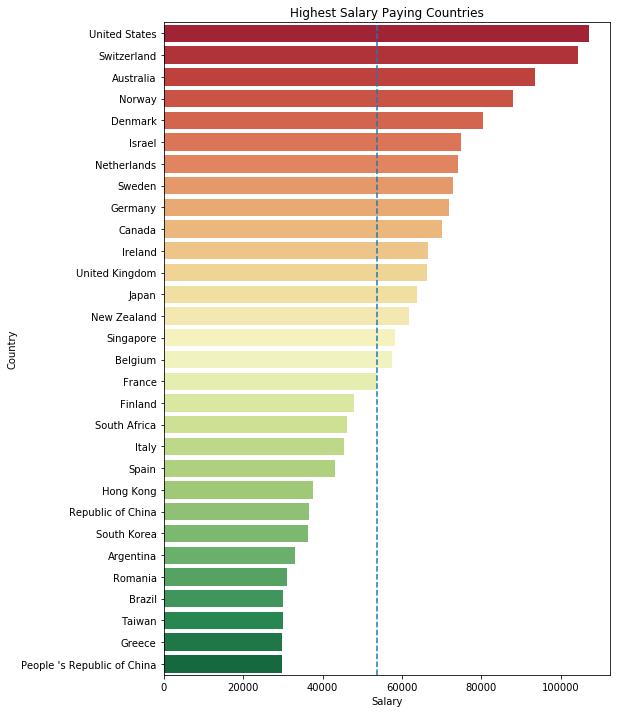

In [65]:
plt.subplots(figsize=(8,12))

sal_coun=salary.groupby(
    'Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn')

plt.axvline(salary['Salary'].median(),linestyle='dashed')
plt.title('Highest Salary Paying Countries')

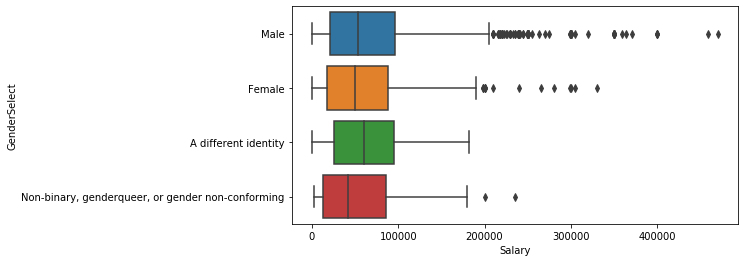

In [66]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)

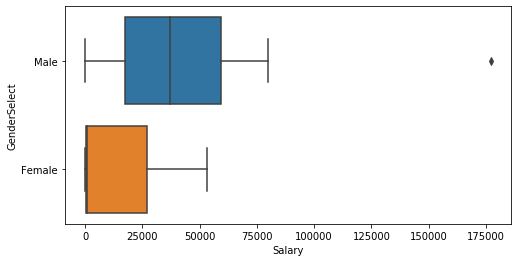

In [67]:
salary_korea=salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [68]:
salary_korea.shape

(26, 8)

In [69]:
salary_korea[salary_korea['GenderSelect']=='Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [70]:
salary_korea_male=salary_korea[salary_korea['GenderSelect']=='Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [72]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


In [74]:
# 자주묻는 질문 FAQ 답변 시각화

# Q9) 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

mcq['PublicDatasetsSelect']=mcq['PublicDatasetsSelect'].astype('str').apply(
lambda x:x.split(','))

In [75]:
q=mcq.apply(lambda x:pd.Series(x['PublicDatasetsSelect']),
           axis=1).stack().reset_index(level=1,drop=True)

q.name='courses'

In [76]:
q=q[q!='nan'].value_counts()

In [77]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


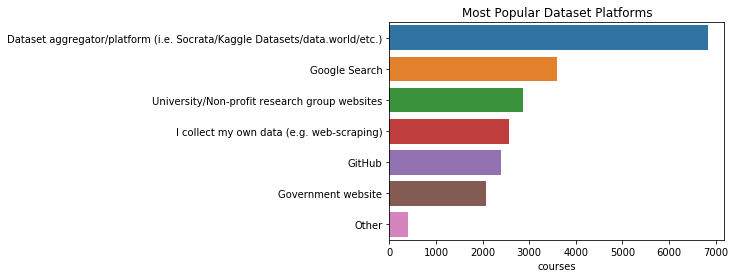

In [78]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index,x=q)

In [79]:
# 주관식 응답을 읽어온다
ff=pd.read_csv('./freeformResponses.csv',encoding='ISO-8859-1',low_memory=False)

ff.shape

(16716, 62)

In [80]:
# 설문내용과 누구에게 물어봤는지를 찾아봄

qc=question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]

print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [83]:
# -> 개인프로젝트에서 공개된 데이터셋을 다루는데 가장 어려운 점은 무엇일까?

ppcff=ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name='응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
-,9
Size,9


In [84]:
# 자주묻는 질문 FAQ 답변 시각화

# Q10) 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

time_features=[x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



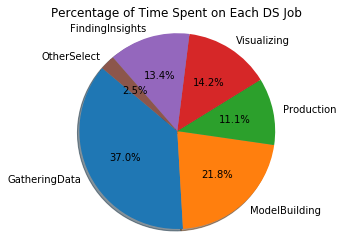

In [86]:
tdf={}
for feature in time_features:
    tdf[feature[len('Time'):]]=mcq[feature].mean()
    
tdf=pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf,labels=tdf.index,
       autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.title('Percentage of Time Spent on Each DS Job')
plt.show()

# -------------------

In [88]:
# 자주묻는 질문 FAQ 답변 시각화

# Q11) 데이터사이언스 직업을 찾는데 가장 고려해야할 요소는 무엇일까요?

#설문 내용과 누구에게 물어봤는지를 찾아봄
qc=question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [89]:
job_factors=[x for x in mcq.columns if x.find('JobFactor') != -1]

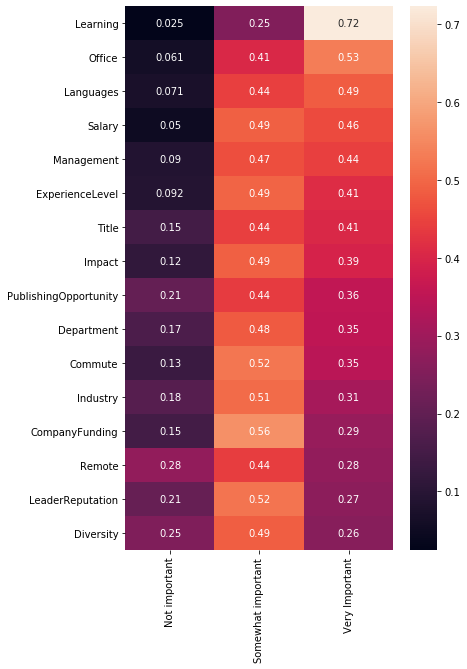

In [91]:
jfdf={}
for feature in job_factors:
    a=mcq[feature].value_counts()
    a=a/a.sum()
    jfdf[feature[len('JobFactor'):]]=a
    
jfdf=pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important',ascending=False), annot=True)

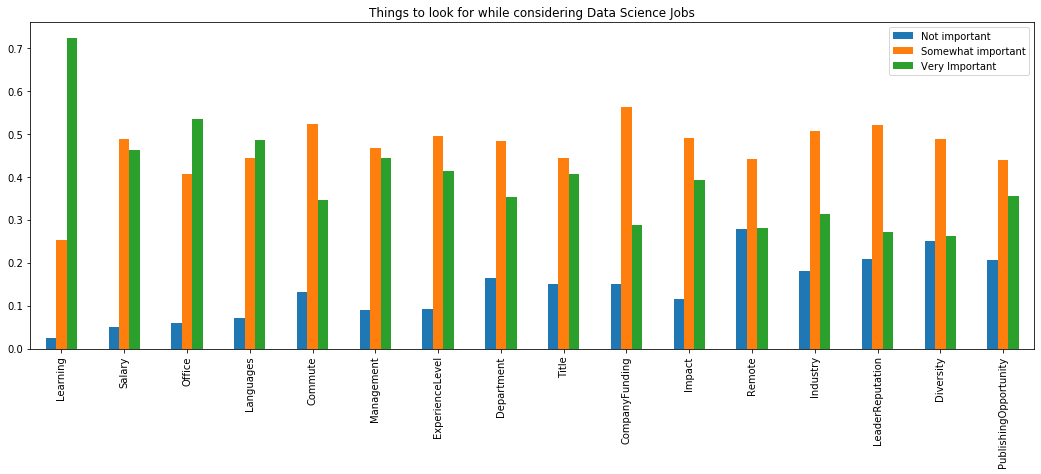

In [92]:
jfdf.plot(kind='bar', figsize=(18,6),
         title="Things to look for while considering Data Science Jobs")
plt.show()

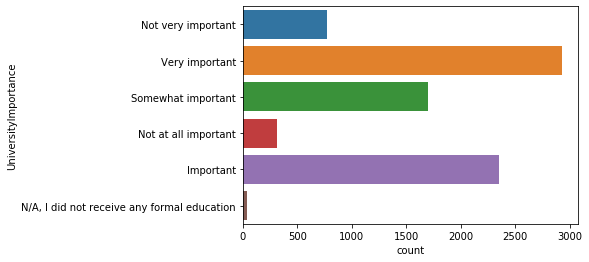

In [93]:
# 자주묻는 질문 FAQ 답변 시각화

# Q12) 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

sns.countplot(y='UniversityImportance', data=mcq)

In [99]:
!pip install plotly

^C


In [105]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

In [106]:
# 자주묻는 질문 FAQ 답변 시각화

# Q13) 어디에서부터 데이터사이언스를 시작해야 할까요?

mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

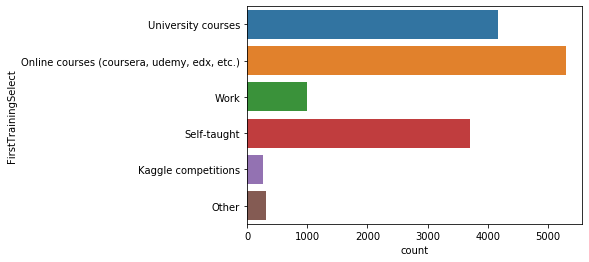

In [107]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

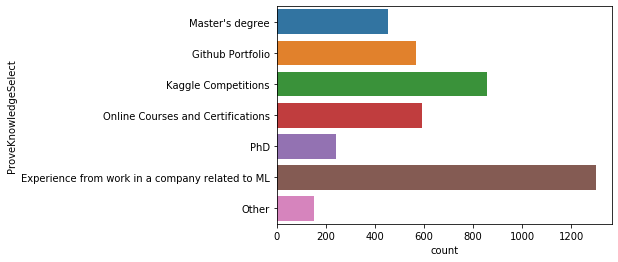

In [108]:
# 자주묻는 질문 FAQ 답변 시각화

# Q14) 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

sns.countplot(y='ProveKnowledgeSelect',data=mcq)

In [111]:
# 자주묻는 질문 FAQ 답변 시각화

# Q15) 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

qc=question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [114]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

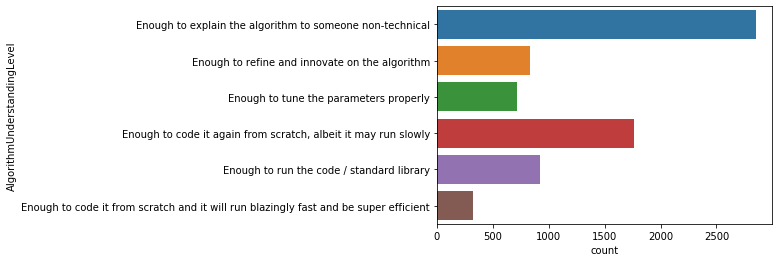

In [117]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

In [118]:
# 자주묻는 질문 FAQ 답변 시각화

# Q16) 어디에서 일을 찾아야 할까요?

# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


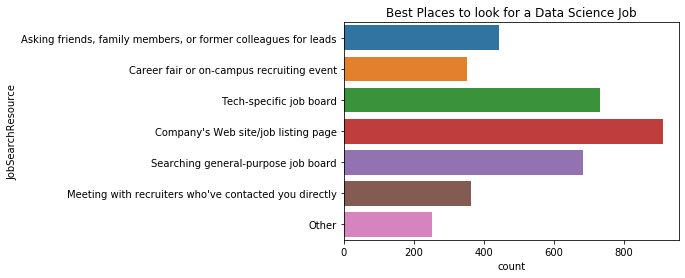

In [119]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

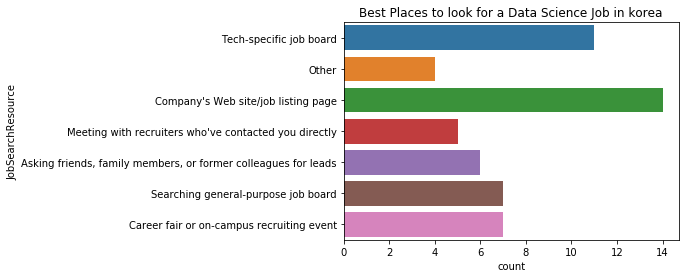

In [122]:
# 위 질문에 대하여 한국사람들은 어떨까?

plt.title("Best Places to look for a Data Science Job in korea")
sns.countplot(y='JobSearchResource', data=korea)

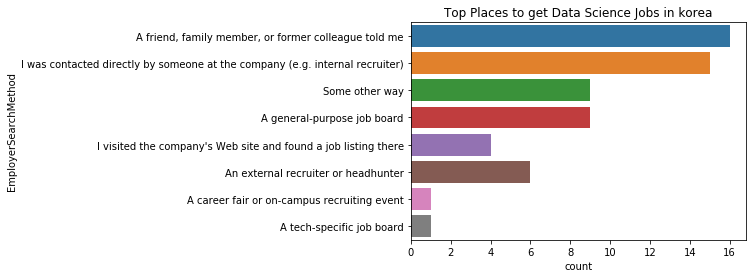

In [123]:
plt.title("Top Places to get Data Science Jobs in korea")
sns.countplot(y='EmployerSearchMethod', data=korea)